In [1]:
import mysql.connector
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Connect to the MySQL database
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='hannibal1999',
    database='crawler_lotech'
)
cursor = cnx.cursor()



query = """select title,score,price from product
order by score desc;"""
cursor.execute(query)
rows = cursor.fetchall()




In [2]:
crawl_df = pd.DataFrame(rows , columns=['model_name' , 'score' , 'price'])
crawl_df['model_name'] = crawl_df['model_name'].astype(str)
crawl_df['model_name'] = crawl_df['model_name'].str.extract(r'لپ تاپ\s(.*?)(?=\s[^\x00-\x7F]+|$)')
crawl_df.loc[crawl_df['model_name'] == 'مک', 'model_name'] = 'mac'
crawl_df.loc[crawl_df['model_name'] == 'سرفیس', 'model_name'] = 'surface'
crawl_df.to_csv("request_16.csv", index=False)

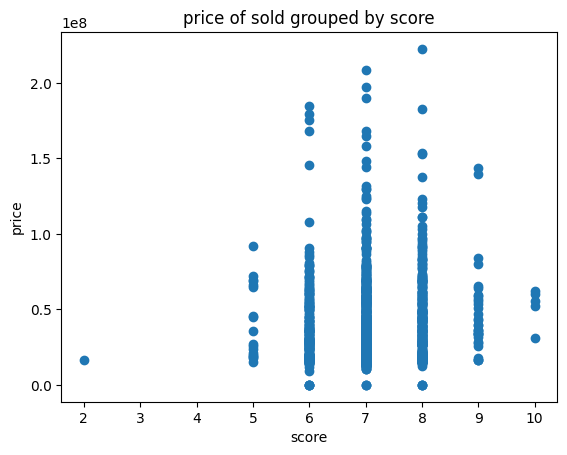

In [3]:
plt.scatter(crawl_df['score'], crawl_df['price'])
plt.xlabel('score')
plt.ylabel('price')
plt.title('price of sold grouped by score')
plt.show()


In [4]:
crawl_df = crawl_df.head(100)

In [5]:
crawl_df

,model_name,score,price
0,Legion 5 Pro,10.0,55500000
1,TUF Gaming F15 FX507ZM,10.0,62000000
2,TUF Dash F15 FX516PR,10.0,60500000
3,IdeaPad 5,10.0,31199000
4,TUF Dash F15 TUF516PE,10.0,52000000
...,...,...,...
95,surface,8.0,58712000
96,mac,8.0,92999000
97,surface,8.0,91899000
98,TUF Gaming A15 FA507RE,8.0,50600000


In [6]:
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='hannibal1999',
    database='lotech'
)
lotech_query = """
select distinct model_name from products;"""
cursor = cnx.cursor()
cursor.execute(lotech_query)
rows = cursor.fetchall()
lotech_df = pd.DataFrame(rows , columns=['model_name'])

lotech_df = lotech_df.drop_duplicates().reset_index(drop=True)
#lotech_df.drop(columns=['model_name'] , inplace=True)
lotech_df

,model_name
0,Vostro 3568
1,Yoga 720-13IKB
2,IdeaPad Y700-15ISK
3,Inspiron 5370
4,Aspire E5-576G
...,...
571,V110-15IAP (N3350/4GB/128GB/No
572,V131 (X5-Z8350/4GB/32GB/FHD/W10)
573,X541NA (N3350/4GB/1TB/FHD/W10)
574,GT73EVR 7RE


In [7]:
cursor.close()
cnx.close()

In [8]:
lotech_df_filtered = lotech_df[lotech_df['model_name'].str.contains('|'.join(crawl_df['model_name']))]


In [9]:
lotech_df_filtered.reset_index(drop=True)
lotech_df_filtered.to_csv("request_16_best.csv", index=True)